In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
sns.set()
import warnings
warnings.filterwarnings('ignore')

# 1.Load the dataset into python environment

In [2]:
df = pd.read_excel("Downloads/Crop.xls")
df



,Domain,Indicator,Item,Element,CountryCode,CountryName,Region,Scenario,Units,Year,Value
0,Crop Production,Arable land,Growing of bananas,Rainfed,CHN,"China, mainland",China,Toward Sustainability,ha,2012,378941.101287
1,Crop Production,Arable land,Growing of bananas,Rainfed,CHN,"China, mainland",China,Toward Sustainability,ha,2030,327151.032340
2,Crop Production,Arable land,Growing of bananas,Rainfed,CHN,"China, mainland",China,Toward Sustainability,ha,2035,317999.663286
3,Crop Production,Arable land,Growing of bananas,Rainfed,CHN,"China, mainland",China,Toward Sustainability,ha,2040,305439.066285
4,Crop Production,Arable land,Growing of bananas,Rainfed,CHN,"China, mainland",China,Toward Sustainability,ha,2050,282125.857178
...,...,...,...,...,...,...,...,...,...,...,...
65530,Crop Production,Cropping intensity,Growing of sunflower seed,Irrigated,TUR,Turkey,Europe/Central Asia,Toward Sustainability,-,2012,0.840730
65531,Crop Production,Cropping intensity,Growing of sunflower seed,Irrigated,TUR,Turkey,Europe/Central Asia,Toward Sustainability,-,2030,1.119916
65532,Crop Production,Cropping intensity,Growing of sunflower seed,Irrigated,TUR,Turkey,Europe/Central Asia,Toward Sustainability,-,2035,1.135997
65533,Crop Production,Cropping intensity,Growing of sunflower seed,Irrigated,TUR,Turkey,Europe/Central Asia,Toward Sustainability,-,2040,1.152077


In [3]:
df.shape

(65535, 11)

In [4]:
np.max(df,axis=0)


Domain               Crop Production
Indicator         Technology shifter
Item                Growing of wheat
Element                      Rainfed
CountryCode                     XECA
CountryName                 Viet Nam
Region           Europe/Central Asia
Scenario       Toward Sustainability
Units                      tonnes/ha
Year                            2050
Value                21015065.144257
dtype: object

In [5]:
np.min(df,axis=0)

Domain            Crop Production
Indicator             Arable land
Item           Growing of bananas
Element                 Irrigated
CountryCode                   ALB
CountryName               Albania
Region                      China
Scenario        Business As Usual
Units                           -
Year                         2012
Value                       0.001
dtype: object

# 2.Preprocessing

1.Missing Values

In [6]:
df.isna().sum()

Domain         0
Indicator      0
Item           0
Element        0
CountryCode    0
CountryName    0
Region         0
Scenario       0
Units          0
Year           0
Value          0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65535 entries, 0 to 65534
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Domain       65535 non-null  object 
 1   Indicator    65535 non-null  object 
 2   Item         65535 non-null  object 
 3   Element      65535 non-null  object 
 4   CountryCode  65535 non-null  object 
 5   CountryName  65535 non-null  object 
 6   Region       65535 non-null  object 
 7   Scenario     65535 non-null  object 
 8   Units        65535 non-null  object 
 9   Year         65535 non-null  int64  
 10  Value        65535 non-null  float64
dtypes: float64(1), int64(1), object(9)
memory usage: 5.5+ MB


In [8]:
df.head()

,Domain,Indicator,Item,Element,CountryCode,CountryName,Region,Scenario,Units,Year,Value
0,Crop Production,Arable land,Growing of bananas,Rainfed,CHN,"China, mainland",China,Toward Sustainability,ha,2012,378941.101287
1,Crop Production,Arable land,Growing of bananas,Rainfed,CHN,"China, mainland",China,Toward Sustainability,ha,2030,327151.032340
2,Crop Production,Arable land,Growing of bananas,Rainfed,CHN,"China, mainland",China,Toward Sustainability,ha,2035,317999.663286
3,Crop Production,Arable land,Growing of bananas,Rainfed,CHN,"China, mainland",China,Toward Sustainability,ha,2040,305439.066285
4,Crop Production,Arable land,Growing of bananas,Rainfed,CHN,"China, mainland",China,Toward Sustainability,ha,2050,282125.857178


In [9]:
df.describe()

,Year,Value
count,65535.000000,6.553500e+04
mean,2033.400000,7.644430e+04
std,12.579444,6.888799e+05
min,2012.000000,1.000000e-03
25%,2030.000000,1.000000e+00
50%,2035.000000,1.453000e+00
75%,2040.000000,3.739800e+01
max,2050.000000,2.101507e+07


<AxesSubplot:>

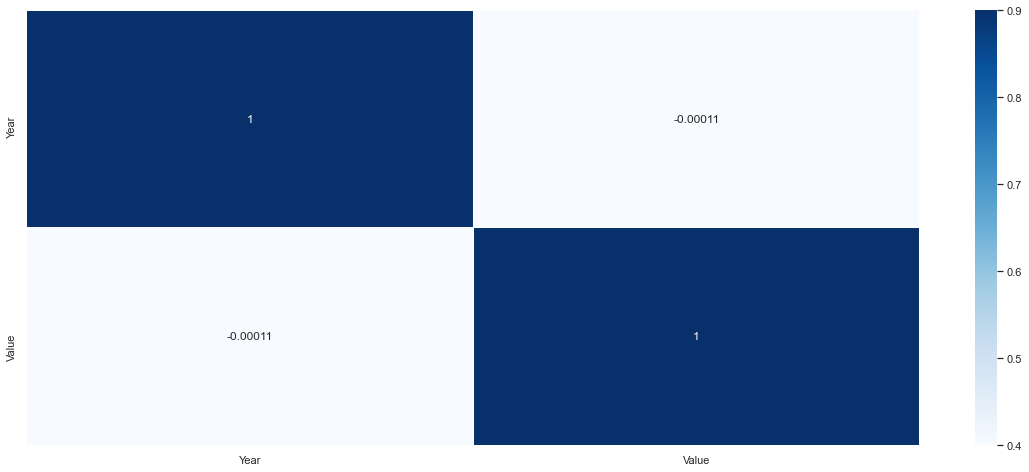

In [10]:
corrmatrix = df.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corrmatrix,vmin=0.4,vmax=0.9,annot=True,linewidths=0.2,cmap='Blues')

2.Outlier Detection and Handling

Text(0.5, 1.0, 'Box plot of Year')

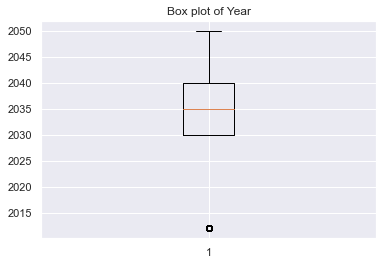

In [11]:
plt.boxplot(df['Year'])
plt.title('Box plot of Year')

Text(0.5, 1.0, 'Box plot of Value')

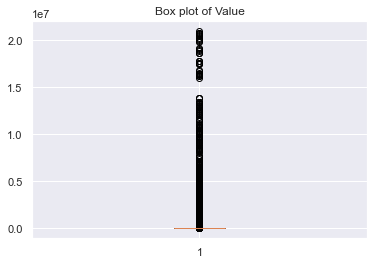

In [12]:
plt.boxplot(df['Value'])
plt.title('Box plot of Value')

In [13]:
Q1 = np.percentile(df['Value'],25,interpolation='midpoint')
Q2 = np.percentile(df['Value'],50,interpolation='midpoint')
Q3 = np.percentile(df['Value'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)

1.0
1.453
37.397999999999996


In [14]:
IQR = Q3-Q1

In [15]:
low_limit = Q1-1.5*IQR
up_limit = Q3+1.5*IQR
print(low_limit)
print(up_limit )

-53.596999999999994
91.99499999999999


In [16]:
outlier = []
for x in df['Value']:
    if((x>up_limit) or (x<low_limit)):
        outlier.append(x)

In [17]:
outlier

[378941.101287171,
 327151.032339985,
 317999.663285868,
 305439.066285043,
 282125.857177885,
 406.775,
 434.925,
 423.998,
 408.617,
 380.177,
 378941.101287171,
 325521.884318017,
 301614.427766596,
 277450.495978837,
 234262.534383524,
 406.775,
 363.393,
 338.185,
 312.359,
 265.983,
 378941.101287171,
 348413.388203939,
 330083.797651829,
 310708.759597433,
 275883.292535253,
 406.775,
 391.633,
 373.263,
 353.316,
 317.29,
 95606.9540683695,
 87072.4044398753,
 87604.1733716721,
 87605.7914055427,
 87769.7423863712,
 162.166,
 178.872,
 178.368,
 176.408,
 173.631,
 95606.9540683695,
 111550.270972259,
 113840.363806684,
 115367.173937741,
 118404.979378691,
 162.166,
 194.874,
 196.231,
 195.834,
 195.895,
 95606.9540683695,
 107306.508920419,
 108569.163793389,
 109134.27243541,
 110347.389369022,
 162.166,
 186.942,
 188.532,
 188.415,
 188.939,
 303980.368413357,
 267741.232940929,
 262856.842091494,
 256165.405787667,
 243375.894175102,
 326.308,
 332.719,
 321.072,
 307.43

In [18]:
ind1=df['Value']>up_limit
df.loc[ind1].index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            65520, 65521, 65522, 65523, 65524, 65525, 65526, 65527, 65528,
            65529],
           dtype='int64', length=14379)

In [19]:
df.drop(df.loc[ind1].index,inplace=True)

Text(0.5, 1.0, 'boxplot of Value')

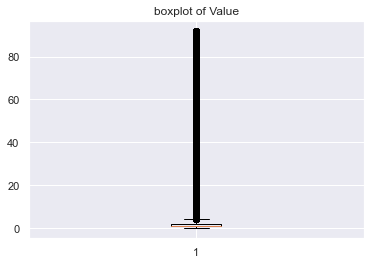

In [20]:
plt.boxplot(df['Value'])
plt.title('boxplot of Value')

Dataset has no outliers significantly

In [21]:
x = df.drop(['Domain','Indicator','Item','Element','CountryName','Region','Scenario','Units','CountryCode'],axis=1)
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(x)

3.Label Encoding

In [22]:
from sklearn.preprocessing import LabelEncoder

In [23]:
labelencoder = LabelEncoder()
x[:, 1] = labelencoder.fit_transform(x[:, 1])
x1 = pd.DataFrame(x)
x1.head()

,0,1
0,-1.697336,2759.0
1,-0.267832,3246.0
2,0.129252,3256.0
3,0.526336,3265.0
4,1.320505,3284.0


In [24]:
df = pd.read_excel("Downloads/Crop.xls")

In [25]:
df.Indicator.unique()

array(['Arable land', 'Harvested area', 'Cropping intensity',
       'Climate shifter', 'Crop yield', 'Technology shifter'],
      dtype=object)

In [26]:
df.columns

Index(['Domain', 'Indicator', 'Item', 'Element', 'CountryCode', 'CountryName',
       'Region', 'Scenario', 'Units', 'Year', 'Value'],
      dtype='object')

In [27]:
x['mean'] = x[['Year','Value']].mean(axis = 1)
x['sum'] = x[['Year','Value']].sum(axis = 1)
x['skew'] = x[['Year','Value']].skew(axis = 1)
x['kurt'] = x[['Year','Value']].kurt(axis = 1)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [28]:
y = df['Year']
x = df.drop(['Domain','Indicator','Item','Element','CountryName','Region','Scenario','Units','CountryCode'],axis=1)
x.describe()

,Year,Value
count,65535.000000,6.553500e+04
mean,2033.400000,7.644430e+04
std,12.579444,6.888799e+05
min,2012.000000,1.000000e-03
25%,2030.000000,1.000000e+00
50%,2035.000000,1.453000e+00
75%,2040.000000,3.739800e+01
max,2050.000000,2.101507e+07


6.Feature Engineering

In [29]:
x.columns

Index(['Year', 'Value'], dtype='object')

Splitting the data

In [30]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 2, test_size = 0.3)

Standard Scaling

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

# 3.Exploratory Data Analysis

In [32]:
df.columns

Index(['Domain', 'Indicator', 'Item', 'Element', 'CountryCode', 'CountryName',
       'Region', 'Scenario', 'Units', 'Year', 'Value'],
      dtype='object')

1.Univariate Analysis

In [33]:
df['Element'].value_counts()

Rainfed      35280
Irrigated    30255
Name: Element, dtype: int64

In [34]:
df['CountryName'].value_counts()

China, mainland                          4950
Myanmar                                  4140
Thailand                                 4050
Rest of EAP                              3780
Viet Nam                                 3690
Cambodia                                 3060
Indonesia                                2790
Lao People's Democratic Republic         2700
Philippines                              2520
Democratic People's Republic of Korea    2520
Turkey                                   2355
Malaysia                                 2070
Kazakhstan                               1980
Tajikistan                               1890
Rest of ECA                              1800
Azerbaijan                               1710
Russian Federation                       1710
Uzbekistan                               1620
Bulgaria                                 1620
Kyrgyzstan                               1530
Romania                                  1530
Ukraine                           

In [35]:
df['Domain'].value_counts()

Crop Production    65535
Name: Domain, dtype: int64

In [36]:
df['Region'].value_counts()

EAP excluding China    32580
Europe/Central Asia    28005
China                   4950
Name: Region, dtype: int64

In [37]:
df['Item'].value_counts()


Growing of dried pulses              5130
Growing of grain maize               4500
Growing of potatoes                  4320
Growing of barley                    3780
Growing of citrus fruits             3150
Growing of paddy rice                2880
Growing of soybeans                  2700
Growing of rape and mustardseed      2610
Growing of sugar beet                2520
Growing of other vegetables          2160
Growing of raw cotton                2160
Growing of groundnuts                2160
Growing of sesame seed               1800
Growing of other crops               1800
Growing of other fruits              1800
Growing of sugar cane                1800
Growing of sorghum                   1620
Growing of sunflower seed            1545
Growing of other fibre crops         1530
Growing of millet                    1530
Growing of coconuts                  1350
Growing of other oilseeds            1260
Growing of tobacco                   1260
Growing of sweet potato and yams  

<AxesSubplot:xlabel='Value', ylabel='Density'>

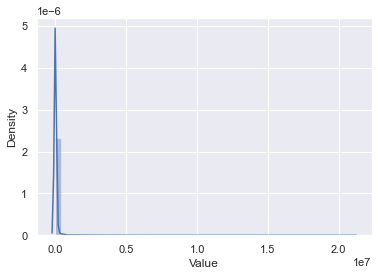

In [38]:
sns.distplot(df.Value)

<AxesSubplot:xlabel='Year', ylabel='Density'>

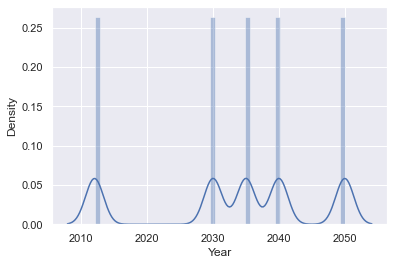

In [39]:
sns.distplot(df.Year)

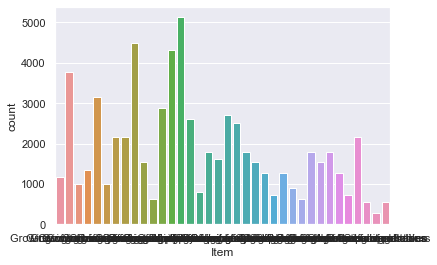

In [40]:
sns.countplot(df.Item) 
plt.rcParams['figure.figsize']=50,100

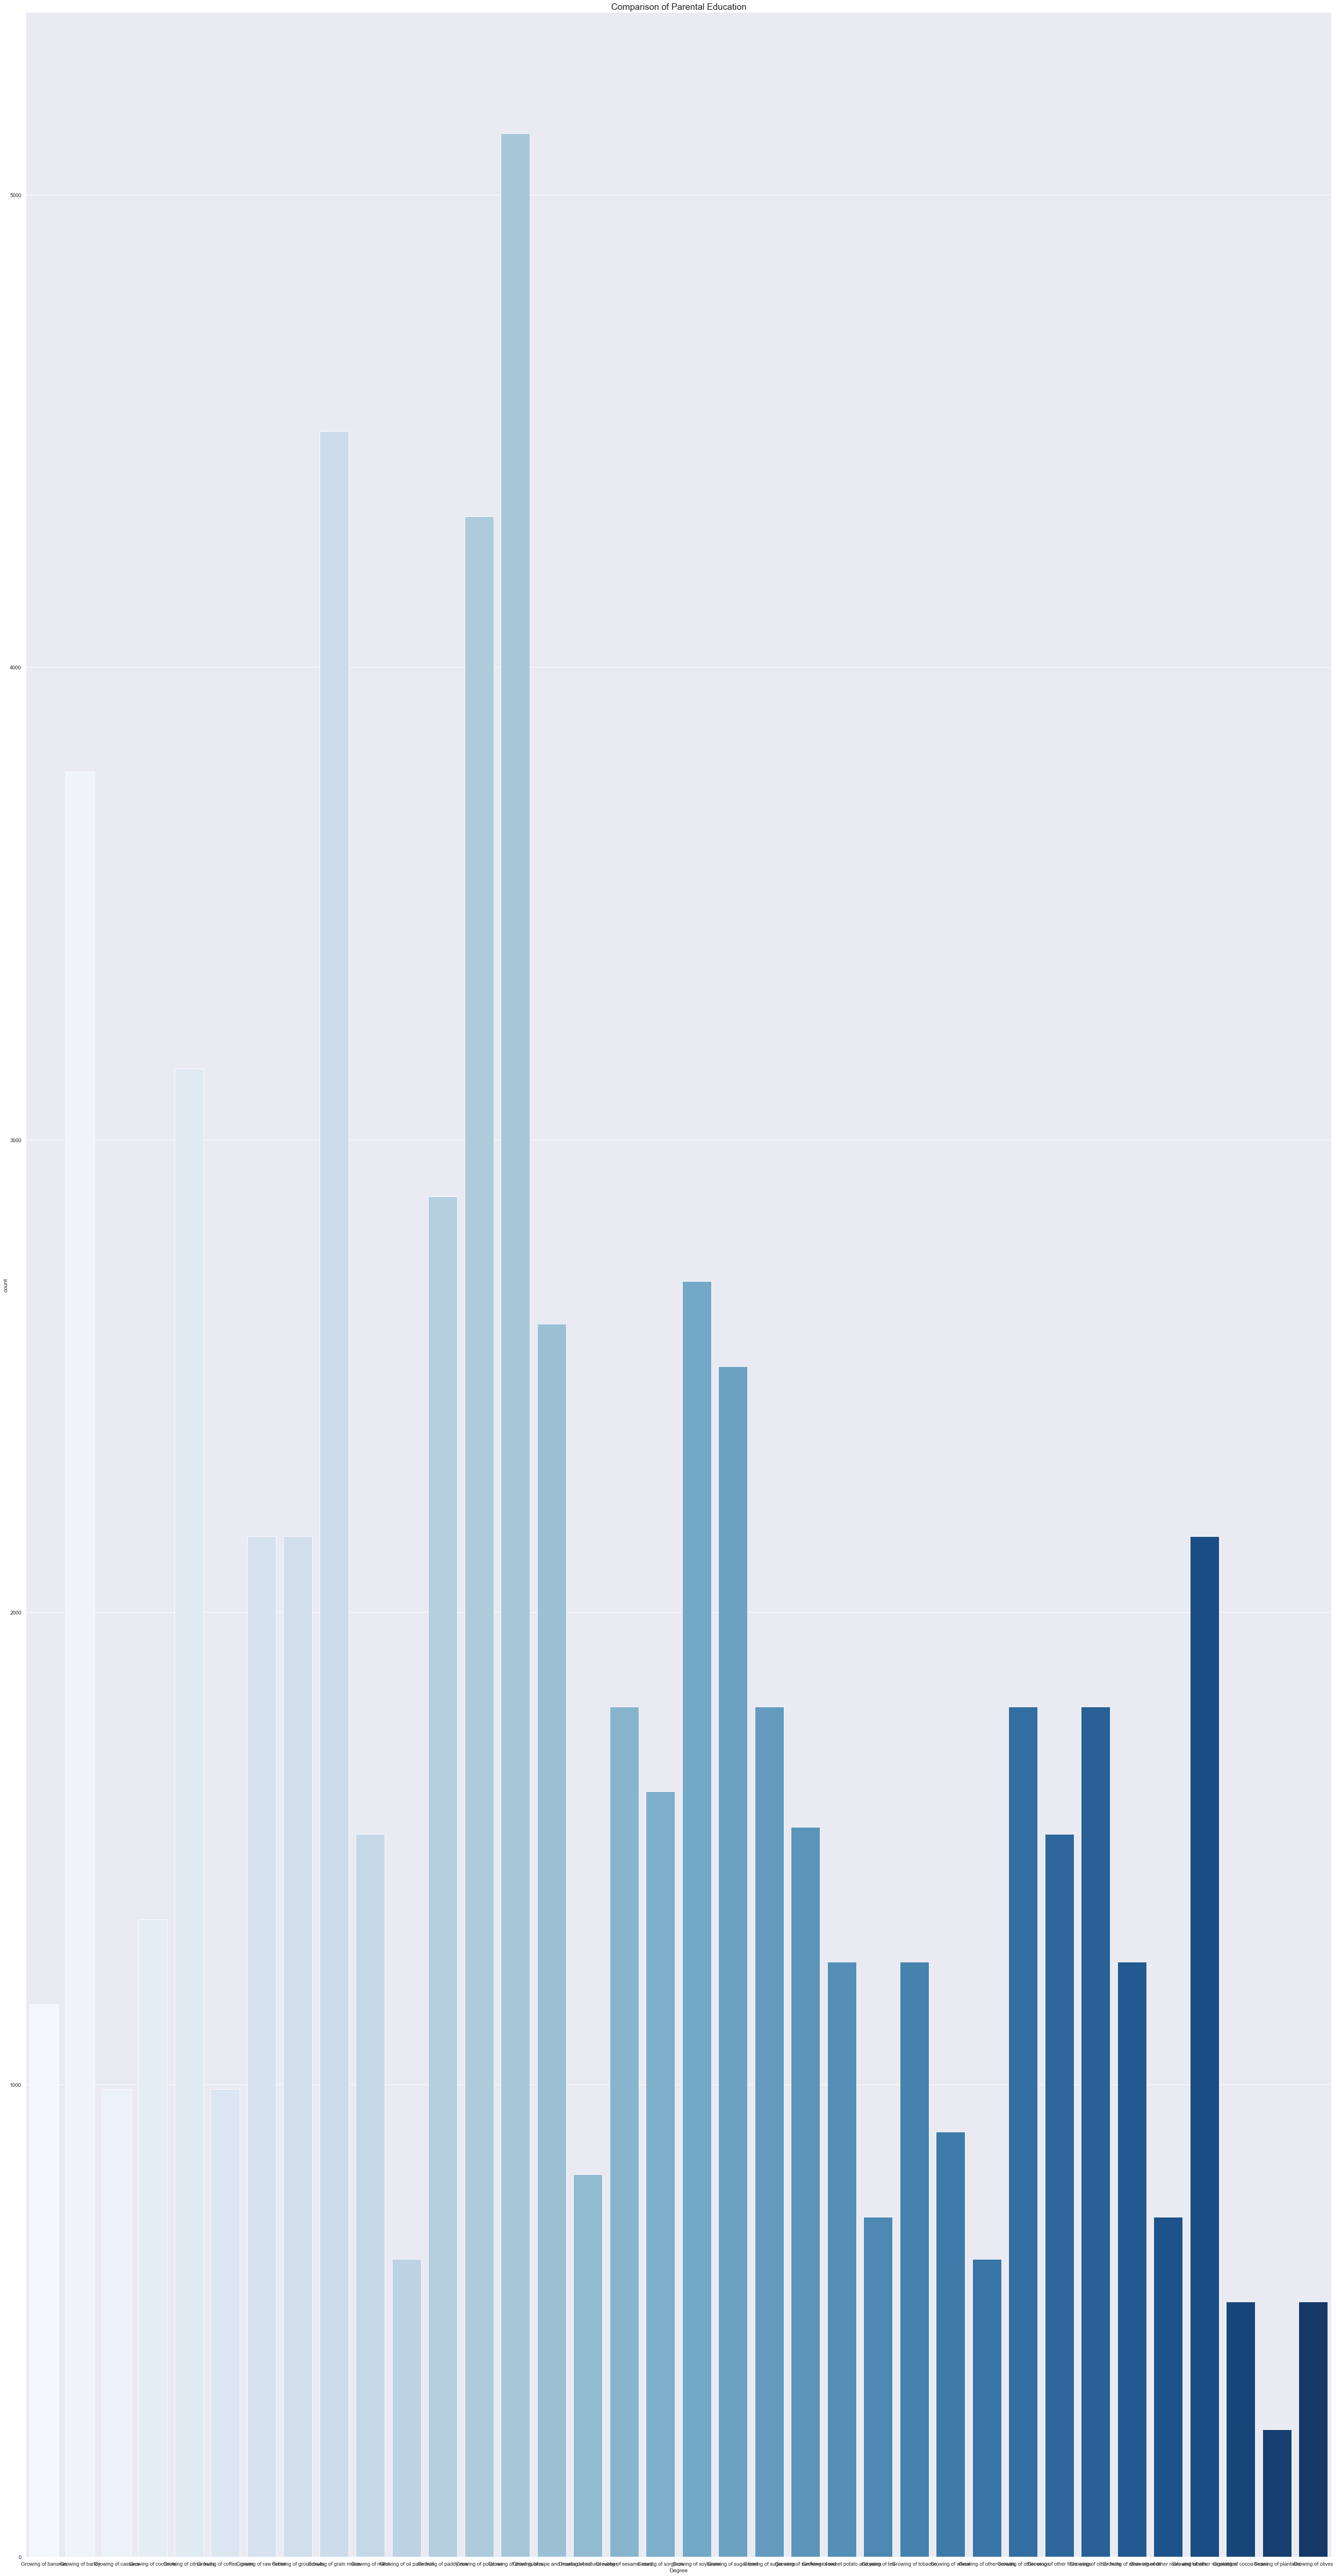

In [41]:
plt.rcParams['figure.figsize'] = (50, 100)
sns.countplot(df['Item'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 19)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

<AxesSubplot:>

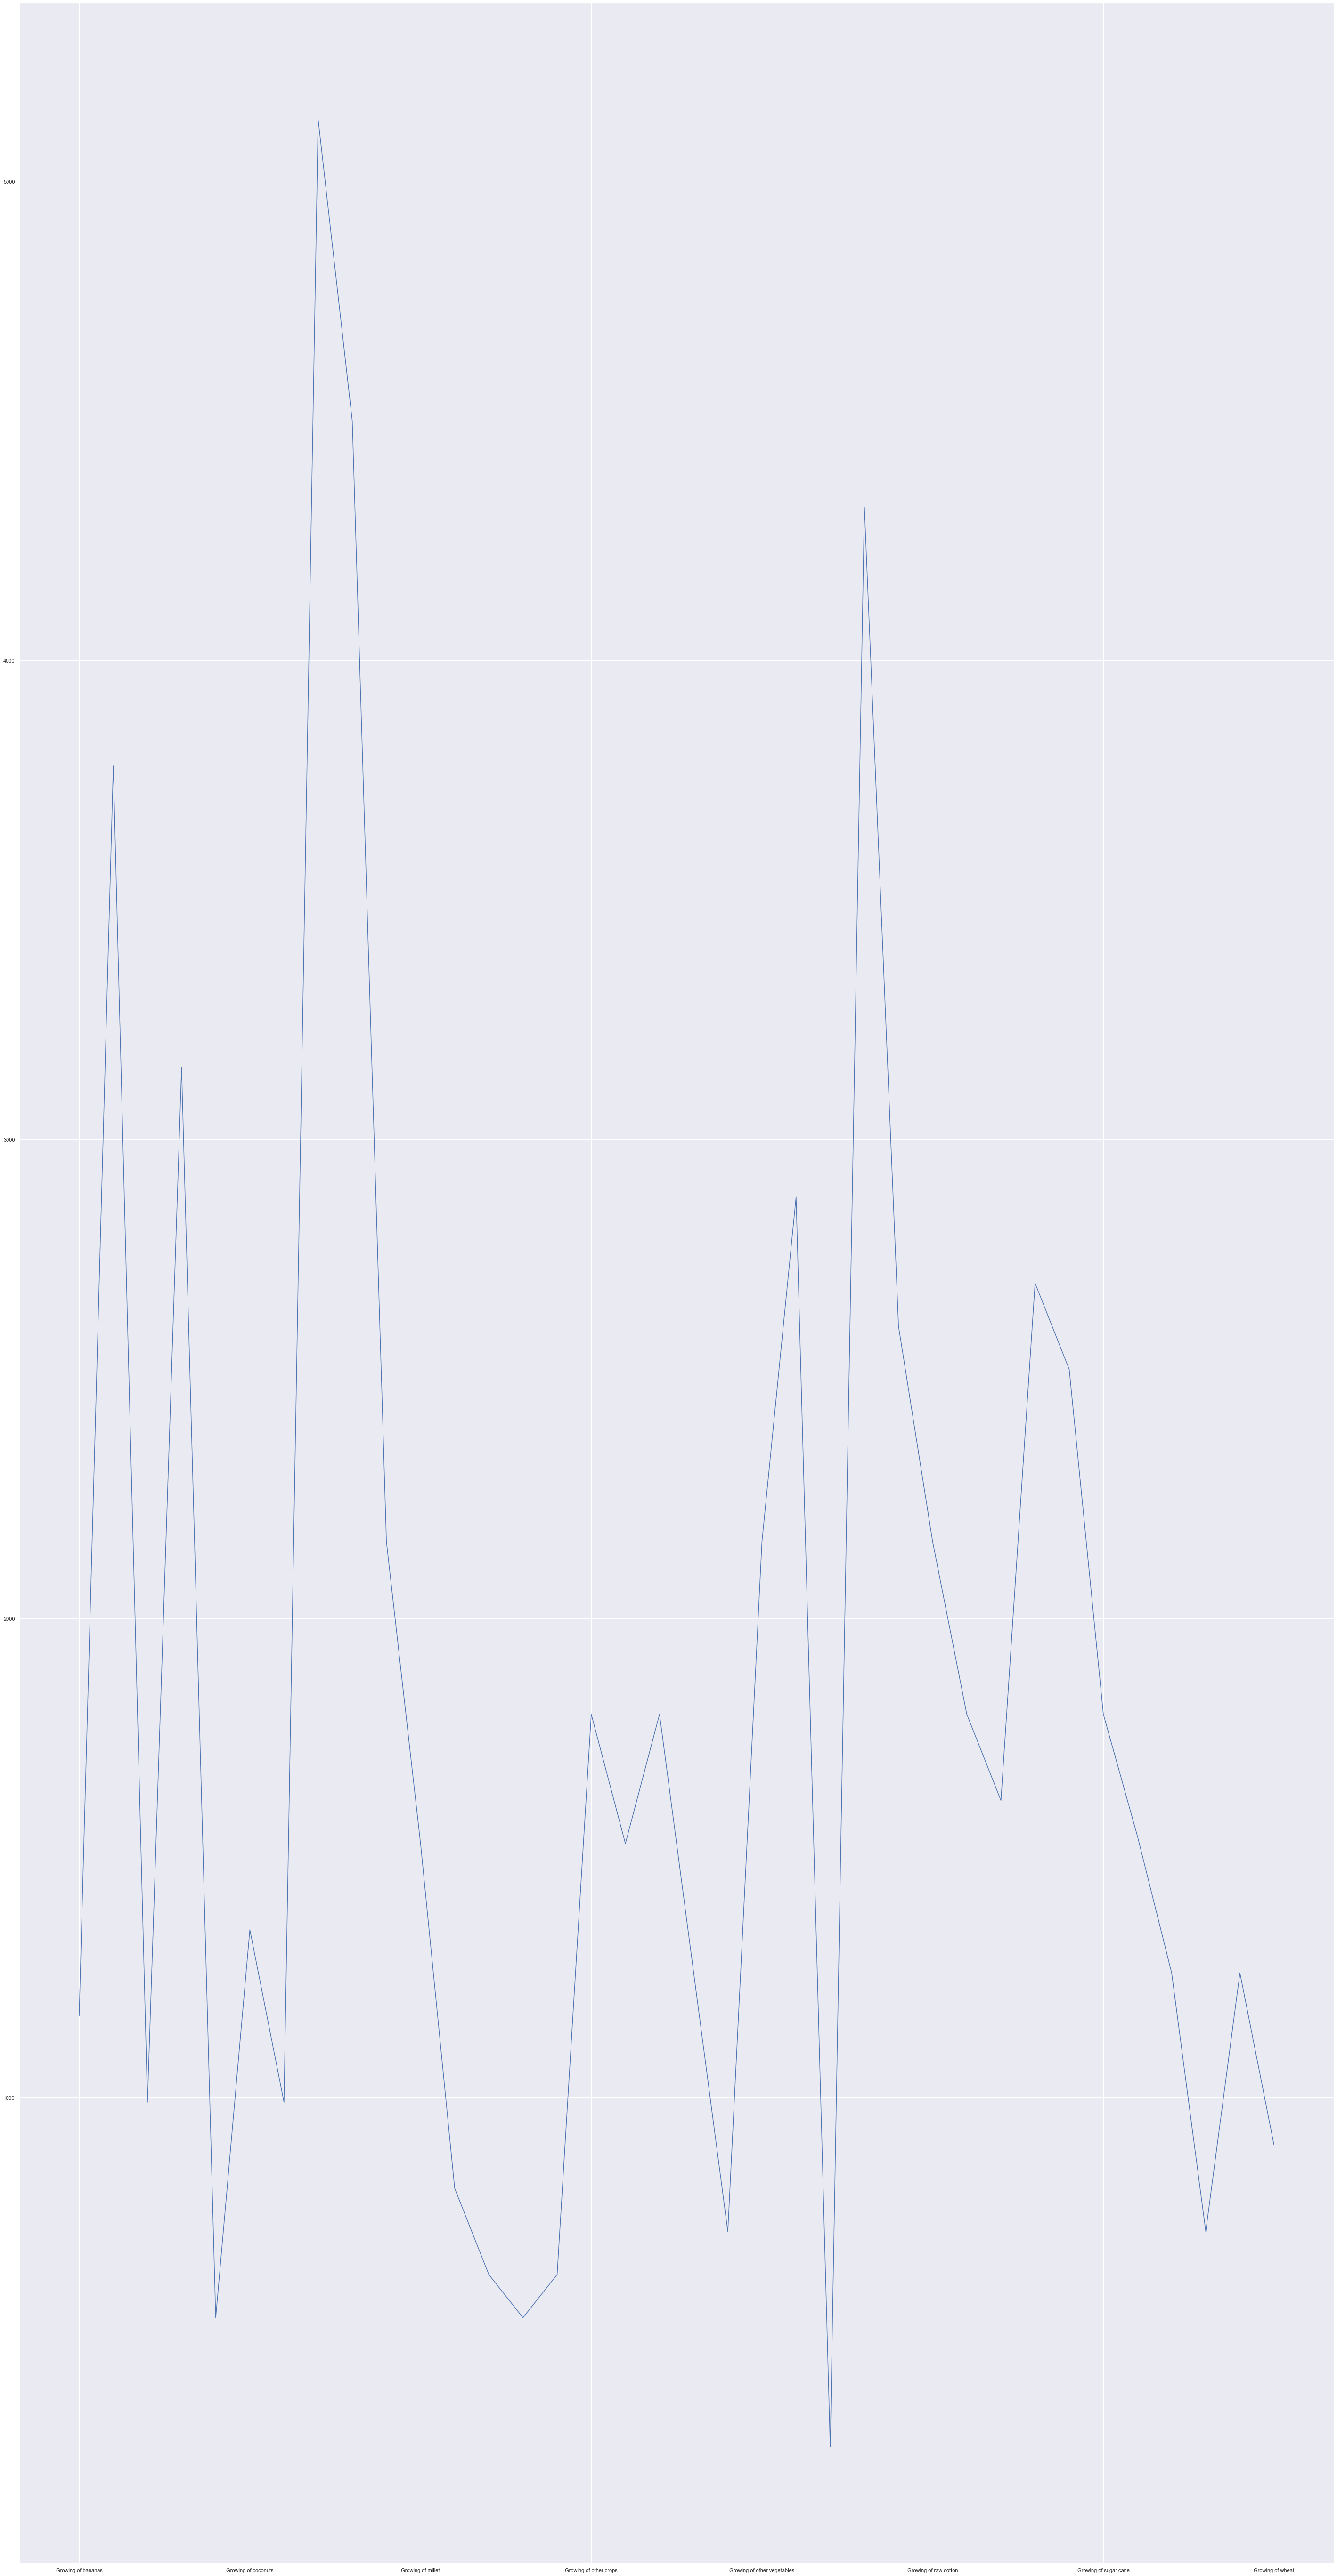

In [42]:
df['Item'].value_counts().sort_index().plot.line()

# 2.Bivariate Analysis

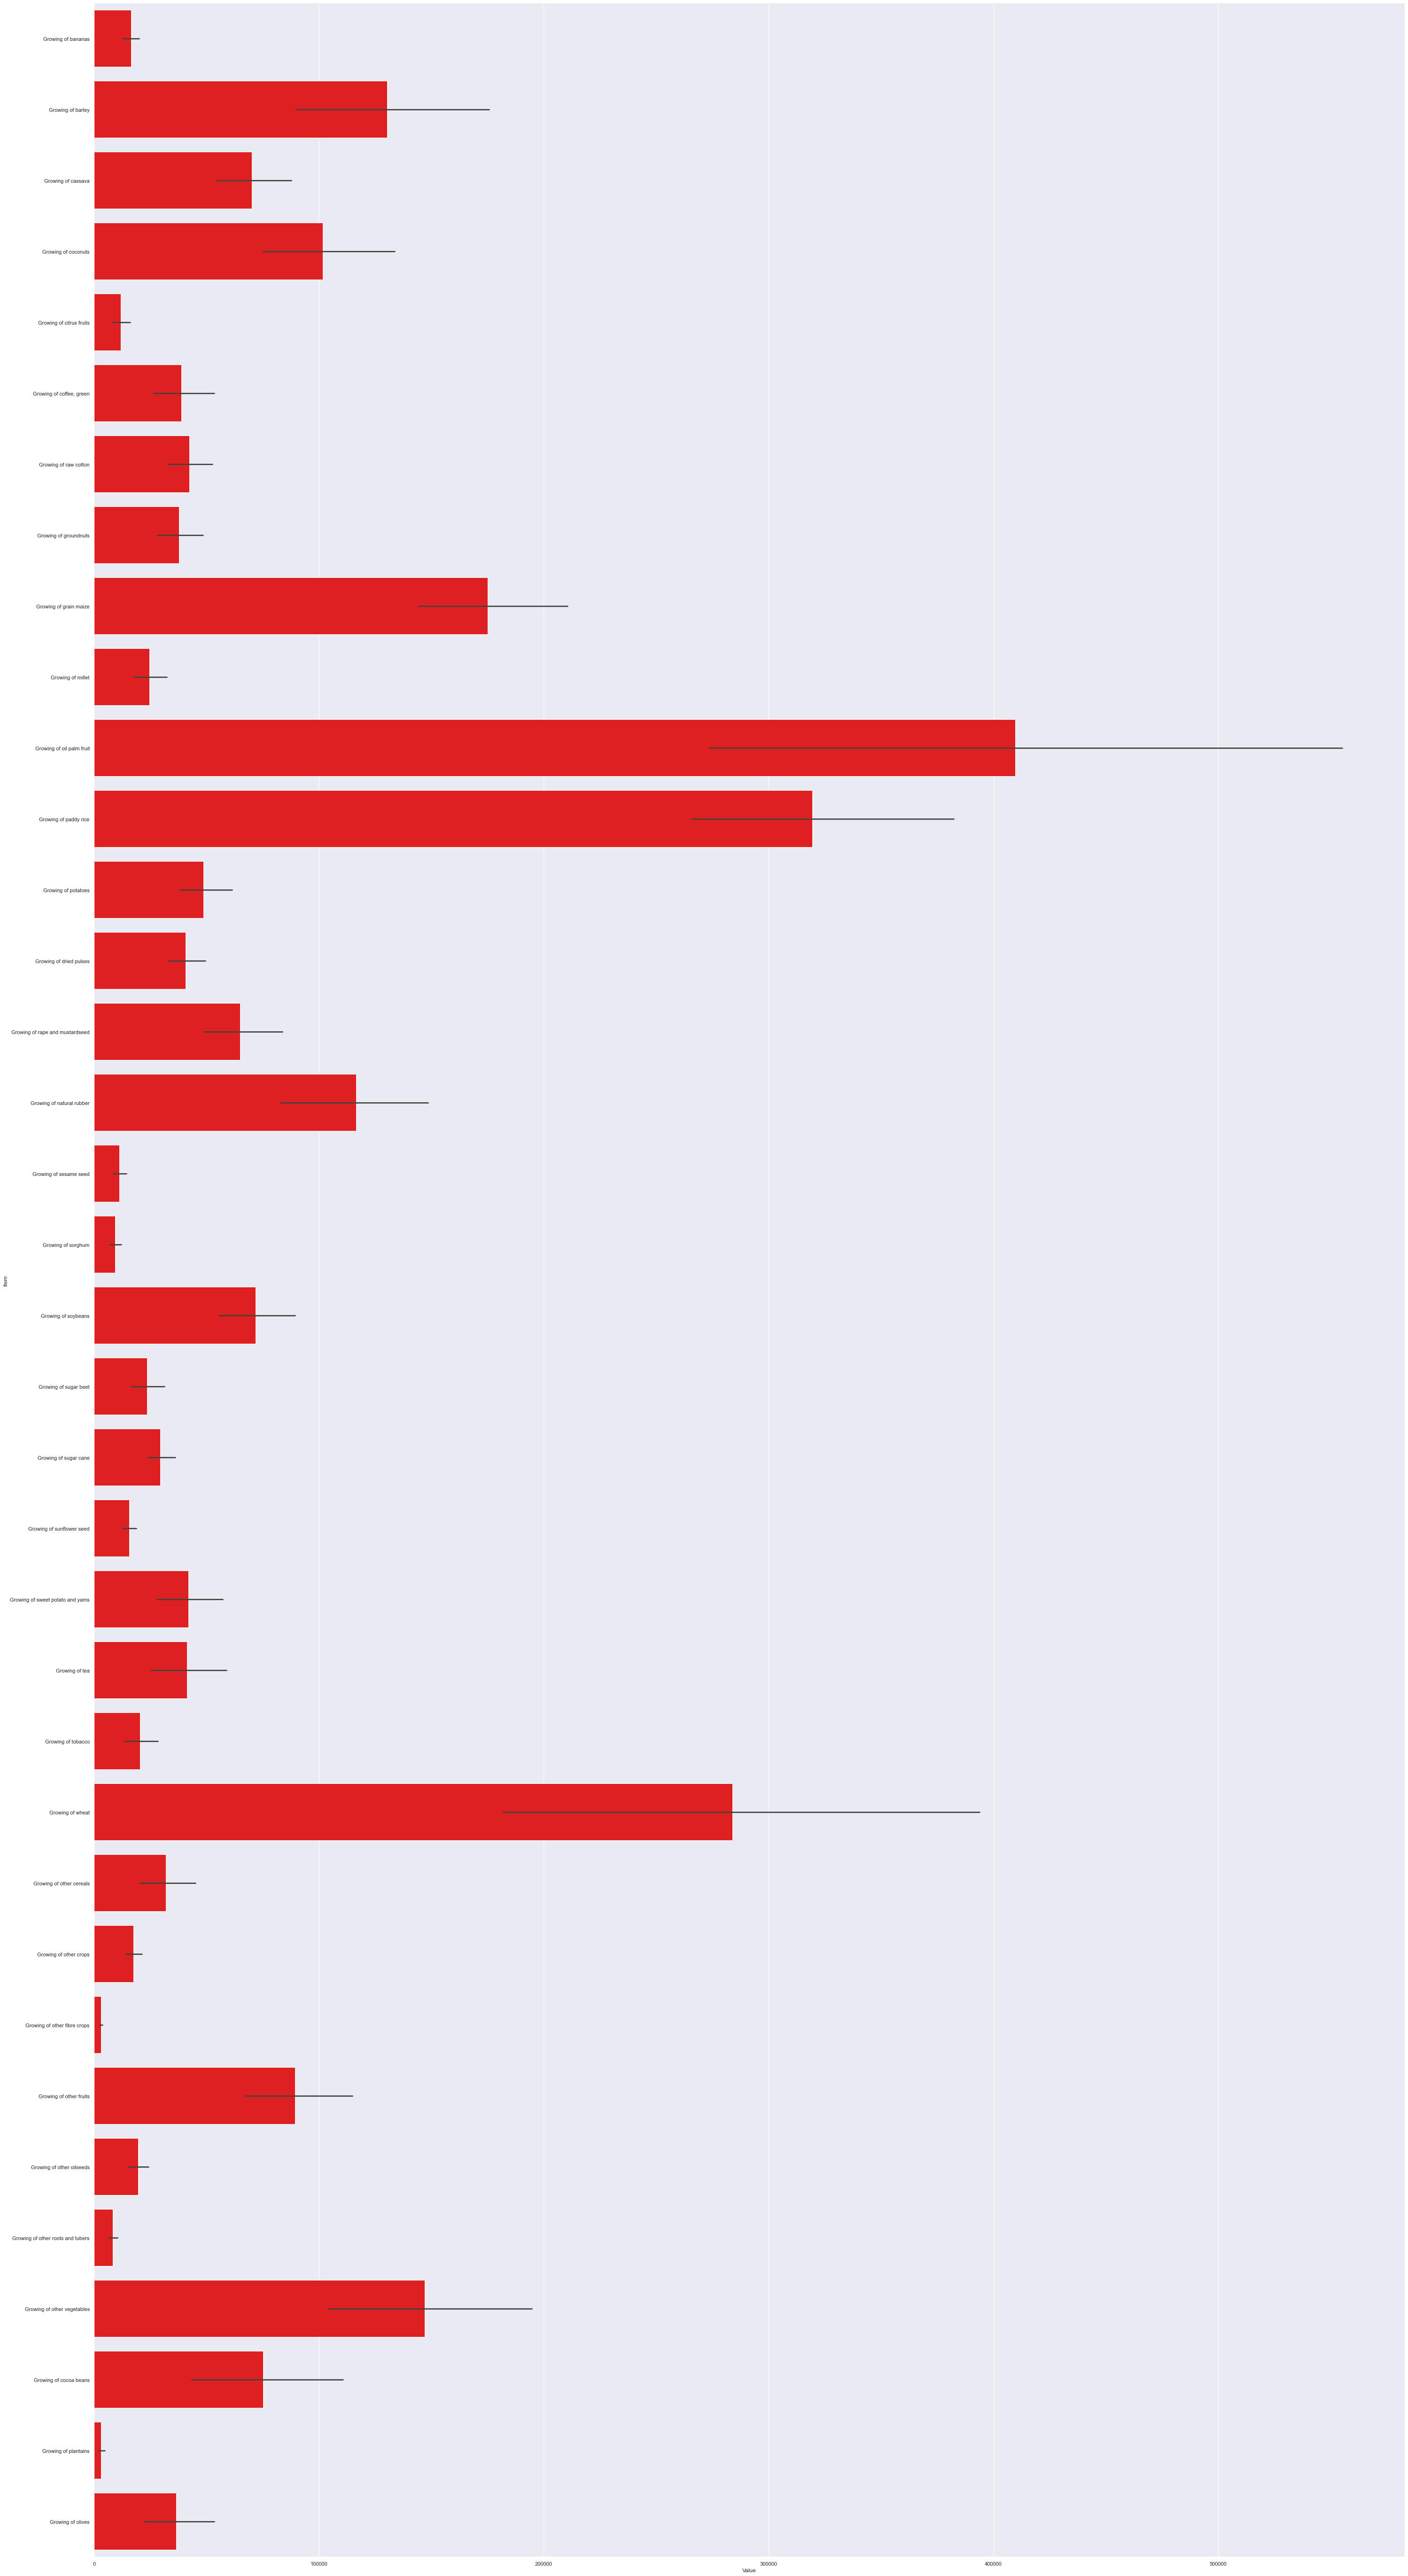

In [43]:
s1 = sns.barplot(x ='Value', y ='Item', data = df, color = 'red')
plt.rcParams['figure.figsize']=1000,100


Growing of oil palm fruit is the highest among all crop production.



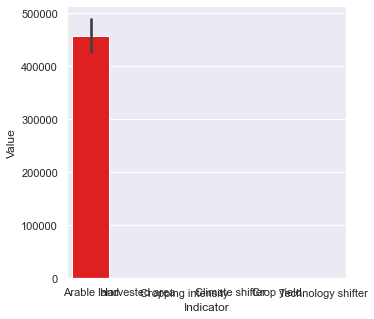

In [45]:
s1 = sns.barplot(x ='Indicator', y ='Value', data = df, color = 'red')
plt.rcParams['figure.figsize']=5,5

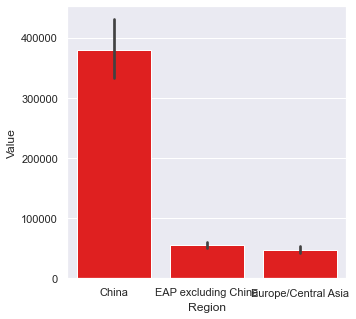

In [46]:
s1 = sns.barplot(x ='Region', y ='Value', data = df, color = 'red')
plt.rcParams['figure.figsize']=10,10

China is the largest crop producer.

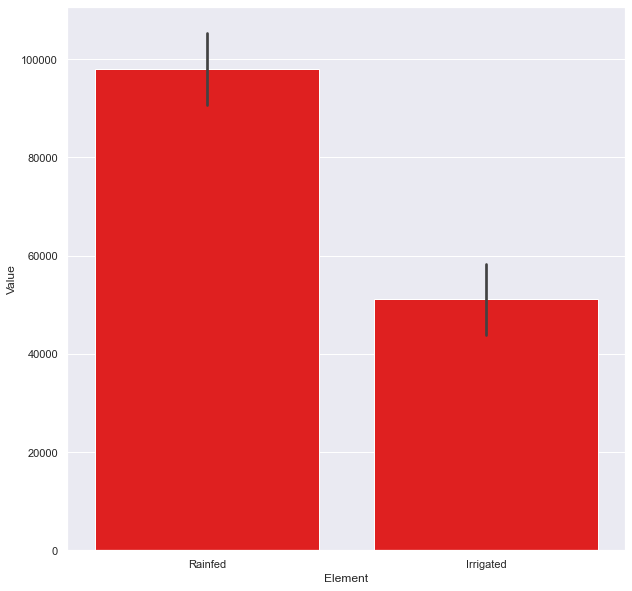

In [47]:
s1 = sns.barplot(x ='Element', y ='Value', data = df, color = 'red')
plt.rcParams['figure.figsize']=10,10

Most of the crops are Rainfed rather than irrigating.

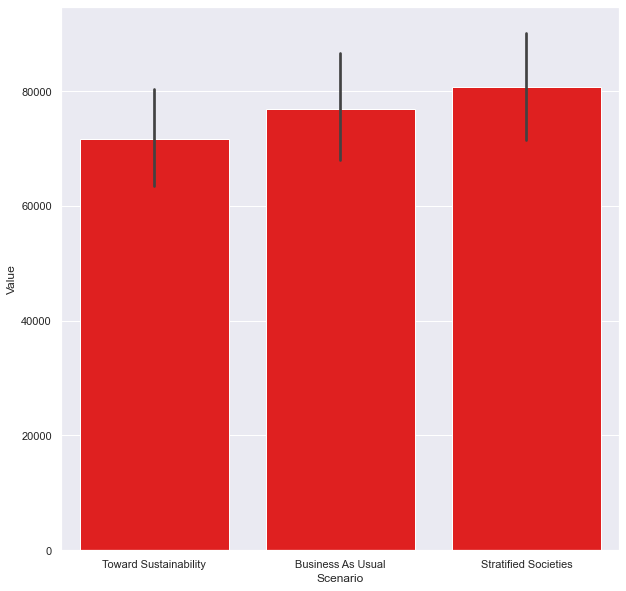

In [48]:
s1 = sns.barplot(x ='Scenario', y ='Value', data = df, color = 'red')
plt.rcParams['figure.figsize']=10,10

The scenario seems to be Stratified societies.

In [49]:
df.corr()

,Year,Value
Year,1.000000,-0.000114
Value,-0.000114,1.000000


# 4.Classification model

building the Model-Logistic Regression Algorithm

In [50]:
from sklearn.linear_model import LogisticRegression
logit_model = LogisticRegression()
logit_model.fit(x_train, y_train)
y_pred = logit_model.predict(x_test)
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [51]:
print("Accuracy is: ", accuracy_score(y_test,y_pred))
print("Precision is: ", precision_score(y_test,y_pred, average = 'micro'))
print("Recall is: ", recall_score(y_test,y_pred,  average = 'micro'))
print("F1 score is: ", f1_score(y_test,y_pred,  average = 'micro'))

Accuracy is:  1.0
Precision is:  1.0
Recall is:  1.0
F1 score is:  1.0


# KNN Algorithm

In [52]:
from sklearn.neighbors import KNeighborsClassifier
acc_values = []
neighbors = np.arange(3,15)
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors = k, metric='minkowski')
    classifier.fit(x_train, y_train)
    y_pred =  classifier.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    acc_values.append(acc)

In [53]:
acc_values

[0.9988810335181323,
 0.9988301714053202,
 0.9991353440821932,
 0.9988301714053202,
 0.9988301714053202,
 0.998779309292508,
 0.9986267229540715,
 0.998474136615635,
 0.9984232745028229,
 0.9982198260515742,
 0.9982706881643864,
 0.9981181018259498]

Text(0, 0.5, 'Accuracy')

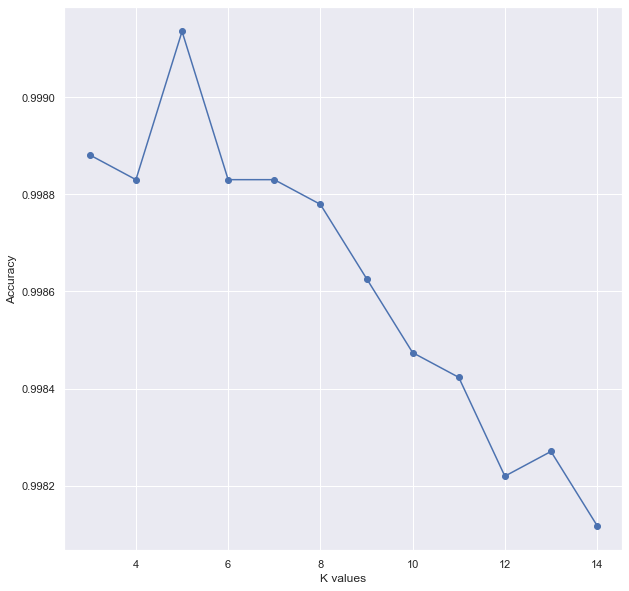

In [54]:
plt.plot(neighbors, acc_values, 'o-')
plt.xlabel('K values')
plt.ylabel('Accuracy')


In [55]:
classifier = KNeighborsClassifier(n_neighbors = 5, metric='minkowski')
classifier.fit(x_train, y_train)
y_pred =  classifier.predict(x_test)   

In [56]:
print("Accuracy is: ", accuracy_score(y_test,y_pred))
print("Precision is: ", precision_score(y_test,y_pred, average = 'micro'))
print("Recall is: ", recall_score(y_test,y_pred,  average = 'micro'))
print("F1 score is: ", f1_score(y_test,y_pred,  average = 'micro'))

Accuracy is:  0.9991353440821932
Precision is:  0.9991353440821932
Recall is:  0.9991353440821932
F1 score is:  0.9991353440821932


In [57]:
confusion_matrix(y_test,y_pred)


array([[3924,    0,    0,    0,    0],
       [   0, 3881,    5,    0,    0],
       [   0,    2, 3950,    1,    0],
       [   0,    5,    0, 3920,    0],
       [   0,    0,    2,    2, 3969]], dtype=int64)

# Decision Tree Algorithm

In [58]:
from sklearn.tree import DecisionTreeClassifier
dt_model =DecisionTreeClassifier()
dt_model.fit(x_train,y_train)
y_pred=dt_model.predict(x_test)

In [59]:
print("Accuracy is: ", accuracy_score(y_test,y_pred))
print("Precision is: ", precision_score(y_test,y_pred, average = 'micro'))
print("Recall is: ", recall_score(y_test,y_pred,  average = 'micro'))
print("F1 score is: ", f1_score(y_test,y_pred,  average = 'micro'))

Accuracy is:  1.0
Precision is:  1.0
Recall is:  1.0
F1 score is:  1.0


In [60]:
confusion_matrix(y_test,y_pred)

array([[3924,    0,    0,    0,    0],
       [   0, 3886,    0,    0,    0],
       [   0,    0, 3953,    0,    0],
       [   0,    0,    0, 3925,    0],
       [   0,    0,    0,    0, 3973]], dtype=int64)

# Rain Forest Classifier Algorithm

In [61]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
print("Accuracy is: ", accuracy_score(y_test,y_pred))
print("Precision is: ", precision_score(y_test,y_pred,  average = 'micro'))
print("Recall is: ", recall_score(y_test,y_pred,  average = 'micro'))
print("F1 score is: ", f1_score(y_test,y_pred, average = 'micro'))

Accuracy is:  1.0
Precision is:  1.0
Recall is:  1.0
F1 score is:  1.0


In [62]:
confusion_matrix (y_test, y_pred)

array([[3924,    0,    0,    0,    0],
       [   0, 3886,    0,    0,    0],
       [   0,    0, 3953,    0,    0],
       [   0,    0,    0, 3925,    0],
       [   0,    0,    0,    0, 3973]], dtype=int64)

In [63]:
from sklearn.model_selection import RandomizedSearchCV

In [64]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [65]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]

# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]
# Method of selecting samples for training each tree
# bootstrap = [True, False]

In [66]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 100, cv = 5, verbose=2)
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   7.8s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   7.7s


In [68]:
from sklearn.metrics import mean_squared_error
print('MSE is :', mean_squared_error(y_test,y_pred))
from sklearn.metrics import r2_score
print('R2 value:', r2_score(y_test,y_pred))

MSE is : 0.0
R2 value: 1.0


As R2 value is one it indicates a perfect fit,i.e,the predictions are identical to the observed values.MSE is zero when a model has no error.

Inference Crop data: China is the largest crop producer. Growing of oil palm fruit is the highest among all crop production. Most of the crops are Rainfed rather than irrigating. The scenario seems to be Stratified societies. The correlation coefficient is-0.000114, so no Relationship between year and value.